In [96]:
!cat jrjModelRegistry/jrjModelRegistry.py | grep registerARjModel


In [97]:
import sys
sys.path.append('./jrjModelRegistry')


In [98]:
import sys
sys.path.append('./jrjModelRegistry')


In [99]:
!ls jrjModelRegistry


__init__.py         frontend            mongo.py
__pycache__         jrjModelRegistry.py


In [100]:
!cat jrjModelRegistry/jrjModelRegistry.py | grep registerAJrjModel



def registerAJrjModel(model, config):


In [101]:
import sys
sys.path.append('.')  


In [102]:
from jrjModelRegistry.jrjModelRegistry import registerAJrjModel


In [103]:
registerAJrjModel  


<function jrjModelRegistry.jrjModelRegistry.registerAJrjModel(model, config)>

In [104]:
import os
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin'


In [105]:
import sys
sys.path.append('./jrjModelRegistry')

from jrjModelRegistry.jrjModelRegistry import registerAJrjModel



In [106]:
import sys
sys.path.append('./jrjModelRegistry')

from jrjModelRegistry.jrjModelRegistry import registerAJrjModel



In [107]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [108]:
import warnings
warnings.filterwarnings("ignore")

In [109]:
from functools import partial

In [110]:
from jrjModelRegistry.mongo import new_model


In [111]:
from dotenv import load_dotenv

from pathlib import Path

env_path = Path("../../.env-live")

if env_path.exists():
    print('envs Loaded')
    load_dotenv(dotenv_path=env_path)
from jrjModelRegistry.jrjModelRegistry import registerAJrjModel

In [112]:
def generalDtPredictor(self, transformedData):
    import pandas as pd
    probs = self.predict_proba(transformedData)
    return pd.Series(probs[:, 1])

In [113]:
def generalDtTransformer(dataForTransfer = None):
    import pandas as pd
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    return df

In [114]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [115]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [116]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [117]:
hDSampleData = {
    "age": [70],
    "sex": [1],
    "BP": [130],
    "cholestrol": [322],
}
hDSampleData

{'age': [70], 'sex': [1], 'BP': [130], 'cholestrol': [322]}

In [118]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [124]:
!pip install six

In [125]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

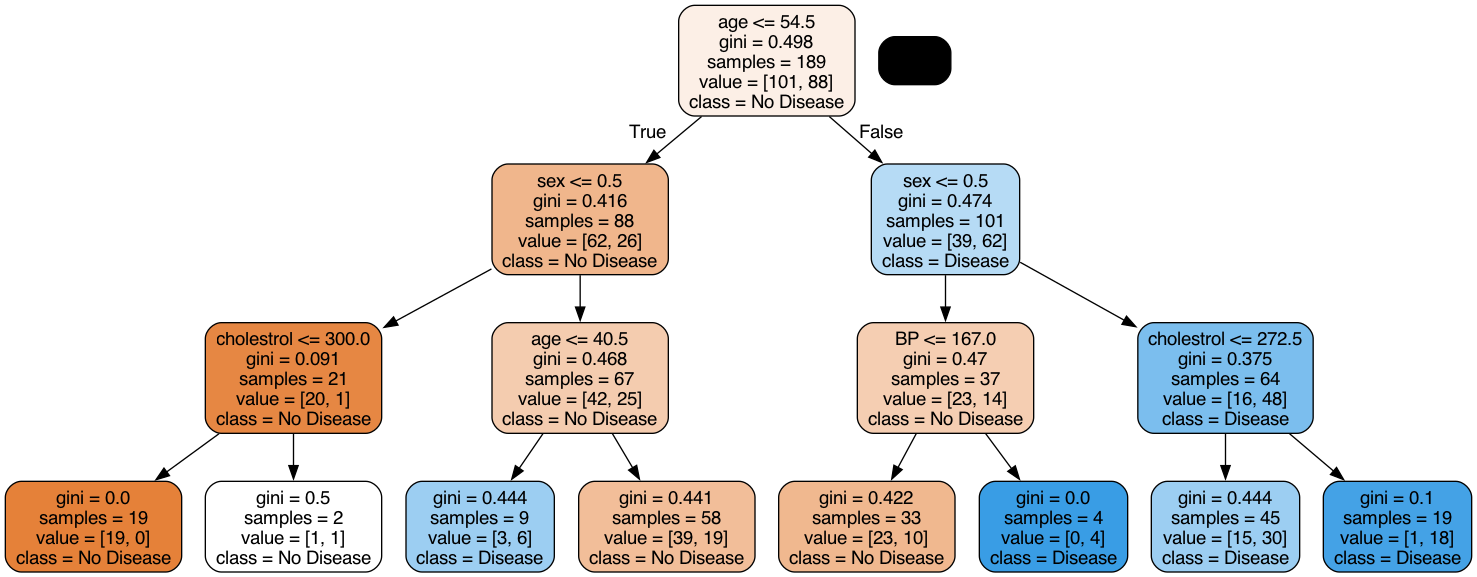

In [126]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

#### Evaluating model performance

In [128]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [130]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [131]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])

Creating helper functions to evaluate model performance and help plot the decision tree

In [133]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [134]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Without setting any hyper-parameters

In [136]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

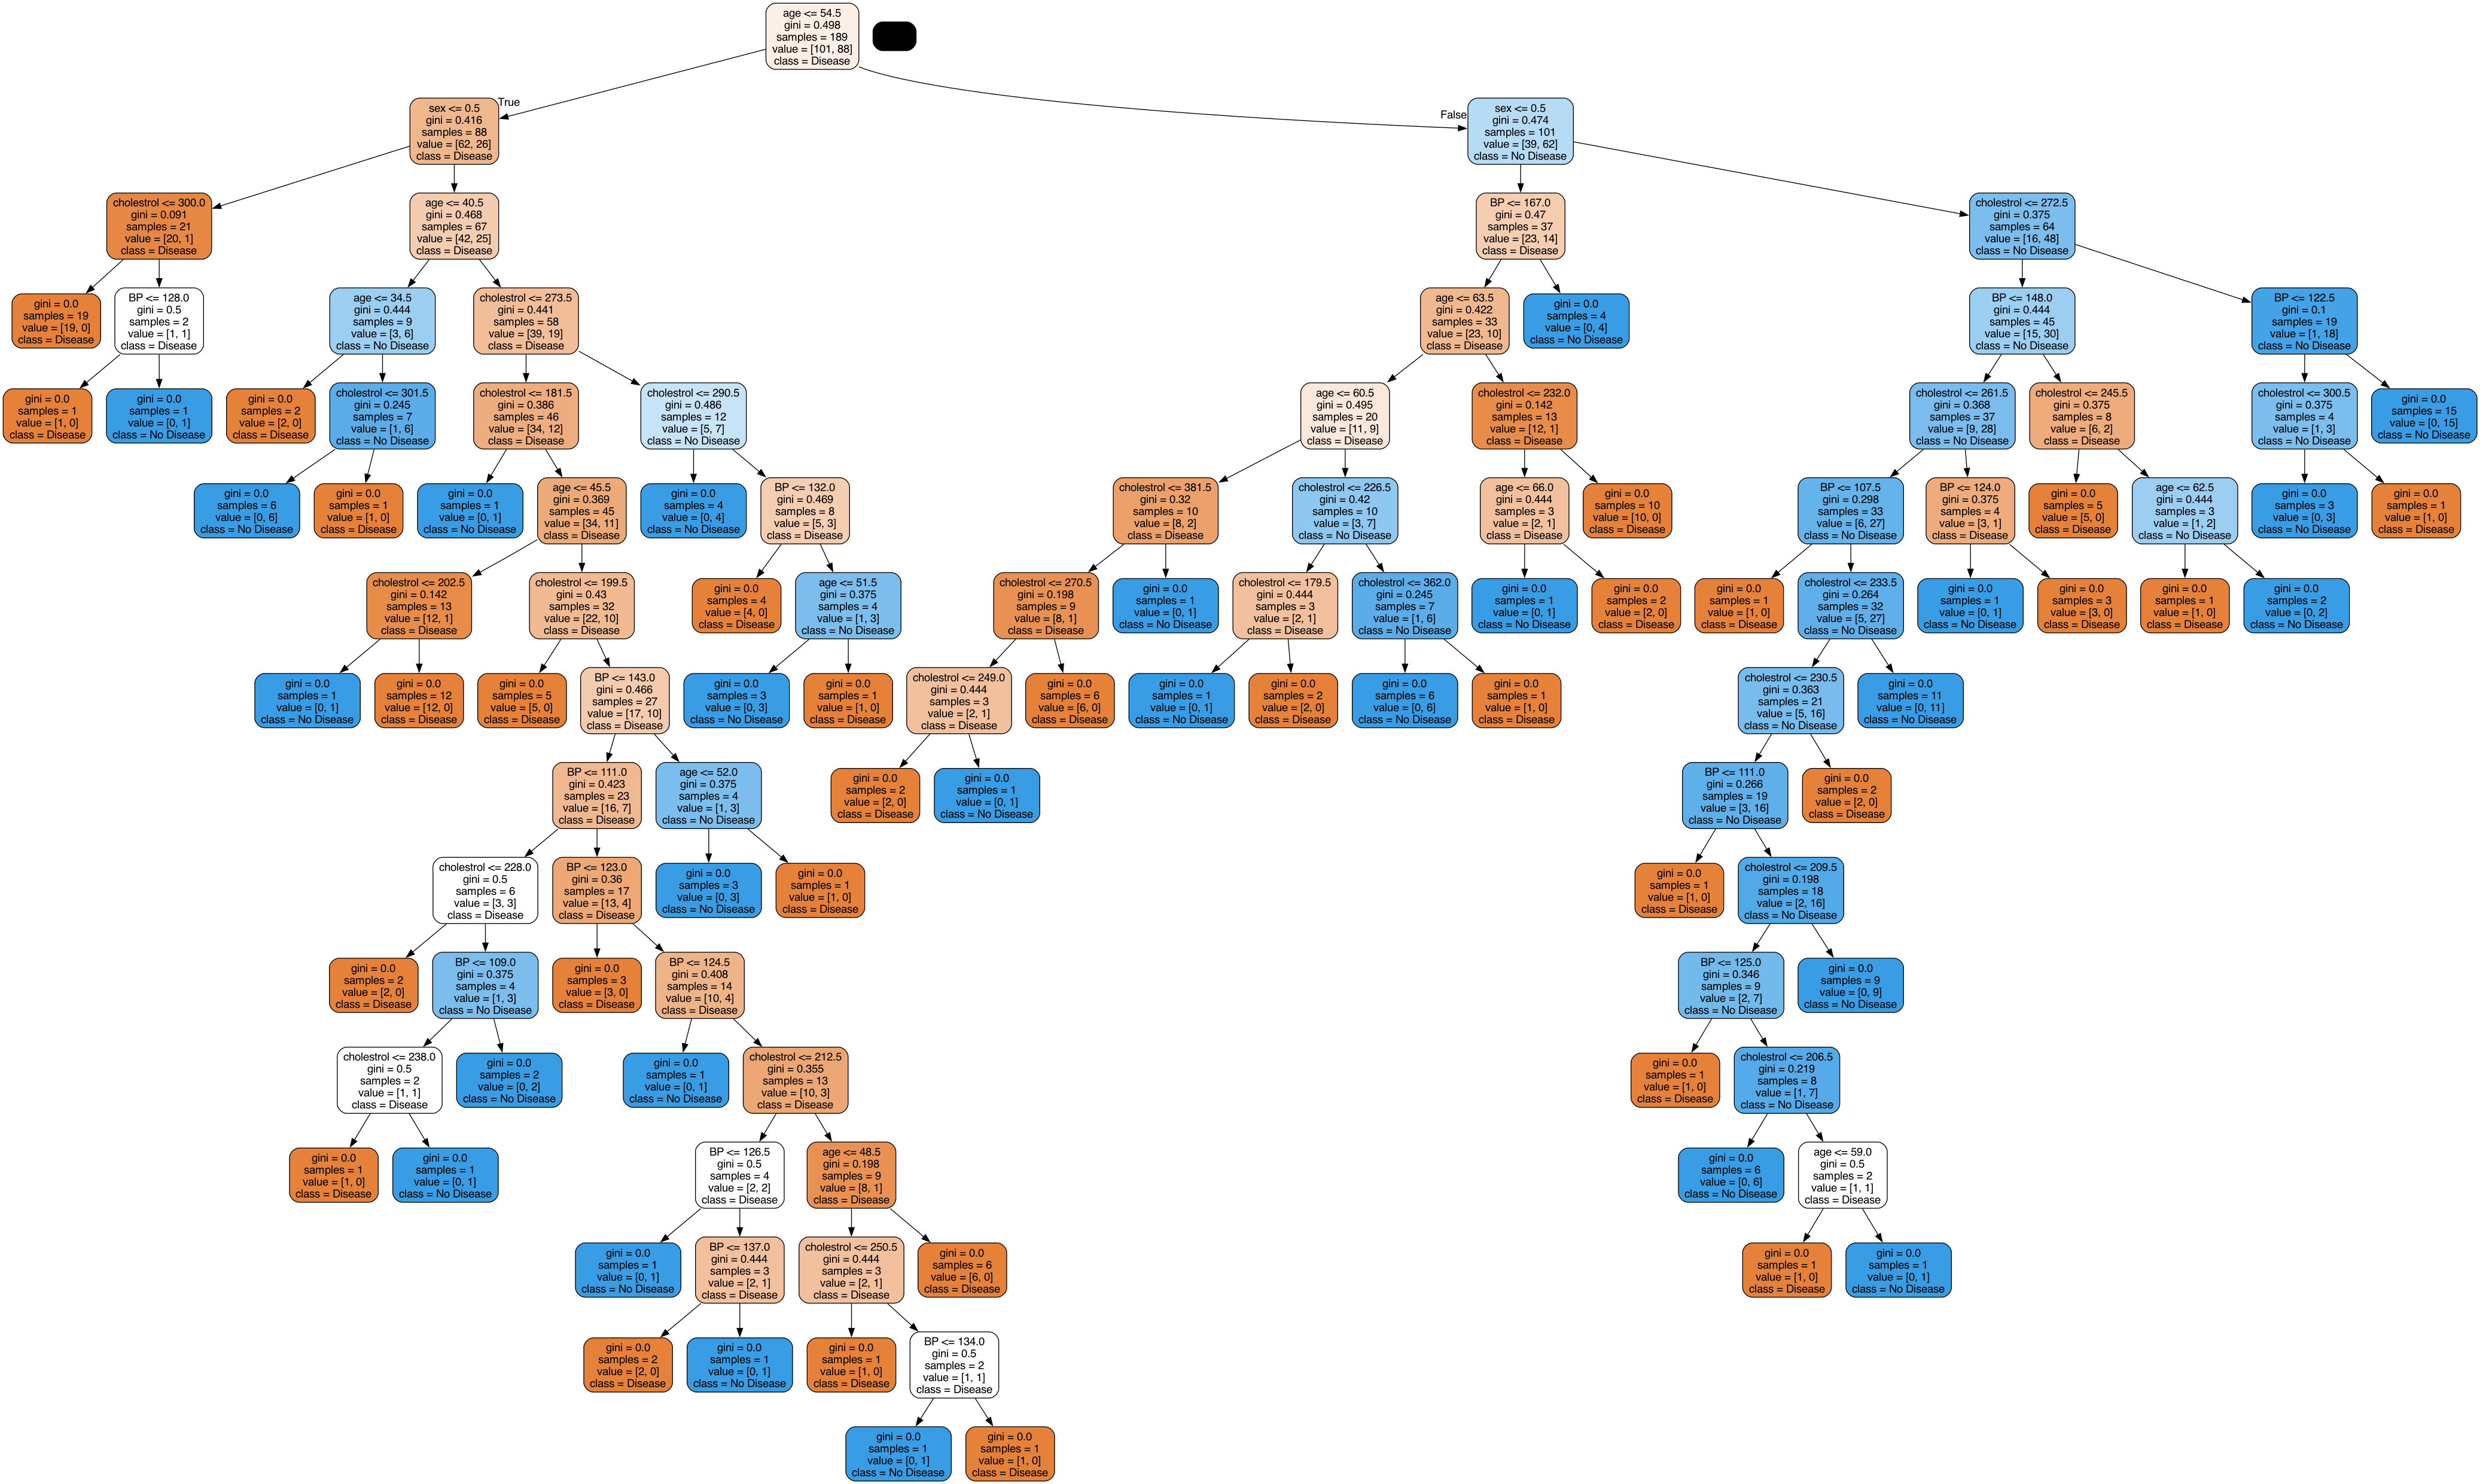

In [137]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [138]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


In [139]:
from sklearn.metrics import accuracy_score, classification_report
import json

In [140]:
dt_default.transformer = generalDtTransformer
dt_default.mainPredictor = partial(generalDtPredictor,dt_default)

In [141]:
y_pred = dt_default.predict(generalDtTransformer(X_test))
# y_pred
score = accuracy_score(y_test, y_pred)
# score
report = classification_report(y_test, y_pred, output_dict=True)
# report

In [142]:
dt_default_metadata = {
    "modelName": "saadet_doga_hascelik__dTModelDefault",
    "version": "1.0.1",
    "params": dt_default.get_params(),  # All model hyperparameters
    "score": float(score),         # Accuracy
    "modelLibrary": "sklearn.tree.DecisionTreeClassifier",
    "libraryMetadata": {
        "feature_importances": dt_default.feature_importances_.tolist(),
        "n_features": int(dt_default.n_features_in_),
        "n_classes": int(dt_default.n_classes_),
        "classes": dt_default.classes_.tolist(),
        "depth": int(dt_default.get_depth()),
        "n_leaves": int(dt_default.get_n_leaves()),
        "classification_report": report
    },
     "sampleData": {
        "dataForTransfer": hDSampleData
    }
}

In [143]:
registerArJModel(
    dt_default,
    dt_default_metadata
)


NameError: name 'registerArJModel' is not defined

In [ ]:
registerAJrjModel(
    dt_default,
    dt_default_metadata
)

### Controlling the depth of the tree

In [ ]:
?DecisionTreeClassifier

In [ ]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

In [ ]:
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [ ]:
evaluate_model(dt_depth)

In [ ]:
dt_depth.transformer = generalDtTransformer
dt_depth.mainPredictor = partial(generalDtPredictor,dt_depth)
y_pred = dt_depth.predict(generalDtTransformer(X_test))
# y_pred
score = accuracy_score(y_test, y_pred)
# score
report = classification_report(y_test, y_pred, output_dict=True)
# report

dt_depth_metadata = {
    "modelName": "saadet_doga_hascelik__dTModelDefault",
    "version": "1.0.1",
    "params": dt_depth.get_params(),  # All model hyperparameters
    "score": float(score),         # Accuracy
    "modelLibrary": "sklearn.tree.DecisionTreeClassifier",
    "libraryMetadata": {
        "feature_importances": dt_depth.feature_importances_.tolist(),
        "n_features": int(dt_depth.n_features_in_),
        "n_classes": int(dt_depth.n_classes_),
        "classes": dt_depth.classes_.tolist(),
        "depth": int(dt_depth.get_depth()),
        "n_leaves": int(dt_depth.get_n_leaves()),
        "classification_report": report
    },
     "sampleData": {
        "dataForTransfer": hDSampleData
    }
}
registerAJrjModel(
    dt_depth,
    dt_depth_metadata
)

### Specifying minimum samples before split

In [ ]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

In [ ]:
gph = get_dt_graph(dt_min_split) 
Image(gph.create_png())

In [ ]:
evaluate_model(dt_min_split)

In [ ]:
dt_min_split.transformer = generalDtTransformer
dt_min_split.mainPredictor = partial(generalDtPredictor,dt_min_split)
y_pred = dt_min_split.predict(generalDtTransformer(X_test))
# y_pred
score = accuracy_score(y_test, y_pred)
# score
report = classification_report(y_test, y_pred, output_dict=True)
# report

dt_min_split_metadata = {
    "modelName": "saadet_doga_hascelik__dTModelMinSplit",
    "version": "1.0.1",
    "params": dt_min_split.get_params(),  # All model hyperparameters
    "score": float(score),         # Accuracy
    "modelLibrary": "sklearn.tree.DecisionTreeClassifier",
    "libraryMetadata": {
        "feature_importances": dt_min_split.feature_importances_.tolist(),
        "n_features": int(dt_min_split.n_features_in_),
        "n_classes": int(dt_min_split.n_classes_),
        "classes": dt_min_split.classes_.tolist(),
        "depth": int(dt_min_split.get_depth()),
        "n_leaves": int(dt_min_split.get_n_leaves()),
        "classification_report": report
    },
     "sampleData": {
        "dataForTransfer": hDSampleData
    }
}
registerAJrjModel(
    dt_min_split,
    dt_min_split_metadata
)

### Specifying minimum samples in leaf node

In [ ]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

In [ ]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [ ]:
evaluate_model(dt_min_leaf)

In [ ]:
dt_min_leaf.transformer = generalDtTransformer
dt_min_leaf.mainPredictor = partial(generalDtPredictor,dt_min_leaf)
y_pred = dt_min_leaf.predict(generalDtTransformer(X_test))
# y_pred
score = accuracy_score(y_test, y_pred)
# score
report = classification_report(y_test, y_pred, output_dict=True)
# report

dt_min_leaf_metadata = {
    "modelName": "saadet_doga_hascelik__dTModelMinLeaf",
    "version": "1.0.1",
    "params": dt_min_leaf.get_params(),  # All model hyperparameters
    "score": float(score),         # Accuracy
    "modelLibrary": "sklearn.tree.DecisionTreeClassifier",
    "libraryMetadata": {
        "feature_importances": dt_min_leaf.feature_importances_.tolist(),
        "n_features": int(dt_min_leaf.n_features_in_),
        "n_classes": int(dt_min_leaf.n_classes_),
        "classes": dt_min_leaf.classes_.tolist(),
        "depth": int(dt_min_leaf.get_depth()),
        "n_leaves": int(dt_min_leaf.get_n_leaves()),
        "classification_report": report
    },
     "sampleData": {
        "dataForTransfer": hDSampleData
    }
}
registerAJrjModel(
    dt_min_leaf,
    dt_min_leaf_metadata
)

### Using Entropy instead of Gini

In [ ]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

In [ ]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [ ]:
evaluate_model(dt_min_leaf_entropy)

In [ ]:
dt_min_leaf_entropy.transformer = generalDtTransformer
dt_min_leaf_entropy.mainPredictor = partial(generalDtPredictor,dt_min_leaf_entropy)
y_pred = dt_min_leaf_entropy.predict(generalDtTransformer(X_test))
# y_pred
score = accuracy_score(y_test, y_pred)
# score
report = classification_report(y_test, y_pred, output_dict=True)
# report

dt_min_leaf_entropy_metadata = {
    "modelName": "saadet_doga_hascelik__dTModelMinLeafEntropy",
    "version": "1.0.1",
    "params": dt_min_leaf_entropy.get_params(),  # All model hyperparameters
    "score": float(score),         # Accuracy
    "modelLibrary": "sklearn.tree.DecisionTreeClassifier",
    "libraryMetadata": {
        "feature_importances": dt_min_leaf_entropy.feature_importances_.tolist(),
        "n_features": int(dt_min_leaf_entropy.n_features_in_),
        "n_classes": int(dt_min_leaf_entropy.n_classes_),
        "classes": dt_min_leaf_entropy.classes_.tolist(),
        "depth": int(dt_min_leaf_entropy.get_depth()),
        "n_leaves": int(dt_min_leaf_entropy.get_n_leaves()),
        "classification_report": report
    },
     "sampleData": {
        "dataForTransfer": hDSampleData
    }
}
registerAJrjModel(
    dt_min_leaf_entropy,
    dt_min_leaf_entropy_metadata
)

### Hyper-parameter tuning

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

In [ ]:
score_df.nlargest(5,"mean_test_score")

In [ ]:
grid_search.best_estimator_

In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
evaluate_model(dt_best)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, dt_best.predict(X_test)))

In [ ]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

In [ ]:
dt_best.transformer = generalDtTransformer
dt_best.mainPredictor = partial(generalDtPredictor,dt_best)
y_pred = dt_best.predict(generalDtTransformer(X_test))
# y_pred
score = accuracy_score(y_test, y_pred)
# score
report = classification_report(y_test, y_pred, output_dict=True)
# report

dt_best_metadata = {
    "modelName": "saadet_doga_hascelik__dTModelBestAccuracy",
    "version": "1.0.1",
    "params": dt_best.get_params(),  # All model hyperparameters
    "score": float(score),         # Accuracy
    "modelLibrary": "sklearn.tree.DecisionTreeClassifier",
    "libraryMetadata": {
        "feature_importances": dt_best.feature_importances_.tolist(),
        "n_features": int(dt_best.n_features_in_),
        "n_classes": int(dt_best.n_classes_),
        "classes": dt_best.classes_.tolist(),
        "depth": int(dt_best.get_depth()),
        "n_leaves": int(dt_best.get_n_leaves()),
        "classification_report": report
    },
     "sampleData": {
        "dataForTransfer": hDSampleData
    }
}
registerAJrjModel(
    dt_best,
    dt_best_metadata
)

# tune for f1


In [ ]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

In [ ]:
score_df.nlargest(5,"mean_test_score")

In [ ]:
grid_search.best_estimator_

In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
evaluate_model(dt_best)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, dt_best.predict(X_test)))

In [ ]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

In [ ]:
dt_best.transformer = generalDtTransformer
dt_best.mainPredictor = partial(generalDtPredictor,dt_best)
y_pred = dt_best.predict(generalDtTransformer(X_test))
# y_pred
score = accuracy_score(y_test, y_pred)
# score
report = classification_report(y_test, y_pred, output_dict=True)
# report

dt_best_metadata = {
    "modelName": "saadet_doga_hascelik__dTModelBestF1",
    "version": "1.0.1",
    "params": dt_best.get_params(),  # All model hyperparameters
    "score": float(score),         # Accuracy
    "modelLibrary": "sklearn.tree.DecisionTreeClassifier",
    "libraryMetadata": {
        "feature_importances": dt_best.feature_importances_.tolist(),
        "n_features": int(dt_best.n_features_in_),
        "n_classes": int(dt_best.n_classes_),
        "classes": dt_best.classes_.tolist(),
        "depth": int(dt_best.get_depth()),
        "n_leaves": int(dt_best.get_n_leaves()),
        "classification_report": report
    },
     "sampleData": {
        "dataForTransfer": hDSampleData
    }
}
registerAJrjModel(
    dt_best,
    dt_best_metadata
)